# Neural Networks
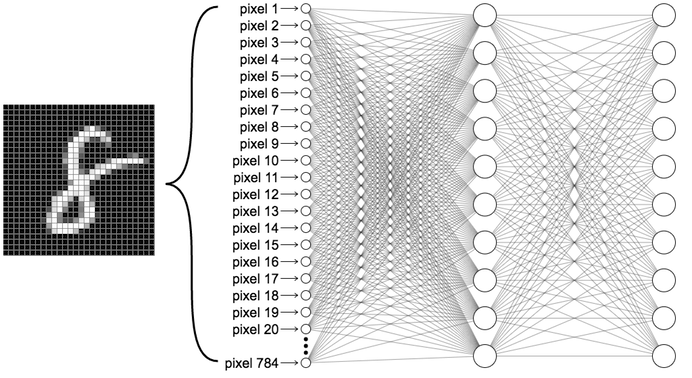

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras

from keras import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Softmax

from keras.utils import to_categorical

Using TensorFlow backend.


# Data

In [2]:
mnist = keras.datasets.mnist.load_data()

In [3]:
(X_train, y_train), (X_test, y_test) = mnist

In [4]:
print(f'Training Images {X_train.shape}, Labels {y_train.shape}')
print(f'Testing  Images {X_test.shape}, Labels {y_test.shape}')

Training Images (60000, 28, 28), Labels (60000,)
Testing  Images (10000, 28, 28), Labels (10000,)


## Example

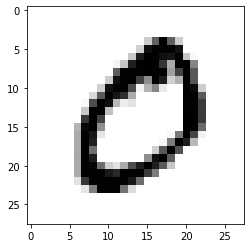

In [5]:

plt.imshow(X_train[1], cmap=plt.cm.binary)

## Data
* Flatten and scale the data
* We lose information when flattening

In [6]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_test  = X_test.reshape(10000, 784).astype('float32')

In [7]:
X_train /= 255
X_test  /= 255

## Labels

In [8]:
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

# Learning Objective
* We have 60,000 28 x 28 pixel images in a training set
* We want to learn how to identify the number in each image

# Gradient Descent
* Gradient Descent uses all the data in each epoch before updating
* Can be hard to break out of local minima
* Training data rarely fits in available memory

## Stochastic Gradient Descent
* Update after each training example
* Online learning 
* High variance - training can be inefficient

## Batch Gradient Descent
* By updating over each batch, we get an averaging of errors
* Averaging errors helps smooth the error surface
* Results in a fewer local minima traps
* Recommendation start at 32 or 64 then move by multiples of two up or down to fit memory

In [9]:
batch_size = 64
epochs=100

# Metrics

In [10]:
resultsDF = pd.DataFrame(columns=['Loss', 'Accuracy'])

## Plotting Helpers

In [58]:
def plotAccuracy(history, color='b'):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(1, len(acc) + 1)
    plt.figure(figsize=(10, 8))
    plt.plot(epochs, acc, 'bo', color=color, label='Train')
    plt.plot(epochs, val_acc, 'b', color=color, label='Validation')
    plt.title('Training & Validation Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()
    
def plotLoss(history, color='b'):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(10, 8))
    plt.plot(epochs, loss, 'bo', color=color, label='Train')
    plt.plot(epochs, val_loss, 'b', color=color, label='Validation')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

## Softmax
* Activation function that squashes the output between 0 and 1
* Designed to maximize the most likely class
* Provides an interpretable probability of being a class

$\operatorname{softmax}(\mathbf{x}) = \frac{\exp x_i}{\sum_i \exp x_i}$

## Categorical CrossEntropy
* Used as a loss function for multi-class classification
* Often paired with softmax activation

$CrossEntropy Loss(p,q) = -\sum_{x\in\mathcal{X}} p(x)\, \log q(x)$

# Shallow Network

In [13]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784, )))
model.add(Dense(10, activation='softmax'))

W0321 16:31:03.741775 140736061514624 deprecation_wrapper.py:119] From /Users/wilsons/anaconda3/envs/pyjup/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0321 16:31:03.756407 140736061514624 deprecation_wrapper.py:119] From /Users/wilsons/anaconda3/envs/pyjup/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0321 16:31:03.758708 140736061514624 deprecation_wrapper.py:119] From /Users/wilsons/anaconda3/envs/pyjup/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

W0321 16:31:03.799057 140736061514624 deprecation_wrapper.py:119] From /Users/wilsons/anaconda3/envs/pyjup/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0321 16:31:03.825605 140736061514624 deprecation_wrapper.py:119] From /Users/wilsons/anaconda3/envs/pyjup/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [16]:
history_shallow = model.fit(X_train, y_train, validation_split=0.1, epochs=epochs, batch_size=batch_size)

W0321 16:31:03.943402 140736061514624 deprecation.py:323] From /Users/wilsons/anaconda3/envs/pyjup/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0321 16:31:03.998028 140736061514624 deprecation_wrapper.py:119] From /Users/wilsons/anaconda3/envs/pyjup/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 1s 18us/step - loss: 1.9025 - acc: 0.5351 - val_loss: 1.4835 - val_acc: 0.7363
Epoch 2/100
54000/54000 [==============================] - 1s 16us/step - loss: 1.2630 - acc: 0.7576 - val_loss: 1.0033 - val_acc: 0.8367
Epoch 3/100
54000/54000 [==============================] - 1s 16us/step - loss: 0.9290 - acc: 0.8135 - val_loss: 0.7575 - val_acc: 0.8658
Epoch 4/100
54000/54000 [==============================] - 1s 16us/step - loss: 0.7511 - acc: 0.8394 - val_loss: 0.6197 - val_acc: 0.8818
Epoch 5/100
54000/54000 [==============================] - 1s 15us/step - loss: 0.6455 - acc: 0.8545 - val_loss: 0.5343 - val_acc: 0.8905
Epoch 6/100
54000/54000 [==============================] - 1s 16us/step - loss: 0.5766 - acc: 0.8645 - val_loss: 0.4775 - val_acc: 0.8958
Epoch 7/100
54000/54000 [==============================] - 1s 15us/step - loss: 0.5283 - acc: 0.8711 - val_loss: 0.4368 - v

54000/54000 [==============================] - 1s 16us/step - loss: 0.2437 - acc: 0.9299 - val_loss: 0.2017 - val_acc: 0.9438
Epoch 60/100
54000/54000 [==============================] - 1s 15us/step - loss: 0.2422 - acc: 0.9306 - val_loss: 0.2005 - val_acc: 0.9437
Epoch 61/100
54000/54000 [==============================] - 1s 15us/step - loss: 0.2407 - acc: 0.9311 - val_loss: 0.1993 - val_acc: 0.9435
Epoch 62/100
54000/54000 [==============================] - 1s 16us/step - loss: 0.2393 - acc: 0.9312 - val_loss: 0.1981 - val_acc: 0.9440
Epoch 63/100
54000/54000 [==============================] - 1s 17us/step - loss: 0.2378 - acc: 0.9318 - val_loss: 0.1971 - val_acc: 0.9442
Epoch 64/100
54000/54000 [==============================] - 1s 15us/step - loss: 0.2364 - acc: 0.9321 - val_loss: 0.1958 - val_acc: 0.9457
Epoch 65/100
54000/54000 [==============================] - 1s 16us/step - loss: 0.2350 - acc: 0.9324 - val_loss: 0.1948 - val_acc: 0.9453
Epoch 66/100
54000/54000 [==============

In [17]:
loss_shallow, accuracy_shallow = model.evaluate(X_test, y_test)
resultsDF.loc['Shallow'] = [loss_shallow, accuracy_shallow]
print(f'Test Loss {loss_shallow}, Accuracy {accuracy_shallow}')

10000/10000 [==============================] - 0s 13us/step
Test Loss 0.19329999619722366, Accuracy 0.9436


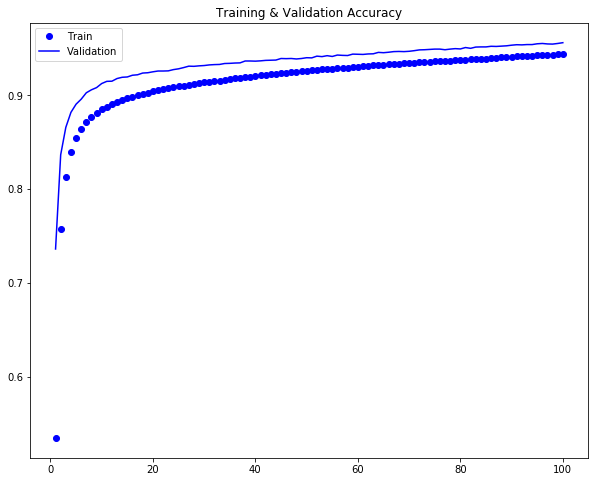

In [39]:
plotAccuracy(history_shallow)

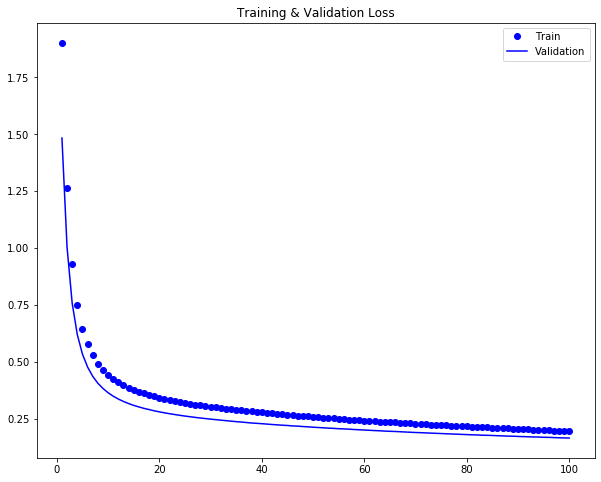

In [40]:
plotLoss(history_shallow)

# Intermediate Network

In [20]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784, )))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
history_intermediate = model.fit(X_train, y_train, validation_split=0.1, epochs=epochs, batch_size=batch_size)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 1s 20us/step - loss: 2.2812 - acc: 0.1730 - val_loss: 2.2421 - val_acc: 0.3720
Epoch 2/100
54000/54000 [==============================] - 1s 17us/step - loss: 2.2072 - acc: 0.3541 - val_loss: 2.1529 - val_acc: 0.5007
Epoch 3/100
54000/54000 [==============================] - 1s 16us/step - loss: 2.0861 - acc: 0.5084 - val_loss: 1.9801 - val_acc: 0.5753
Epoch 4/100
54000/54000 [==============================] - 1s 17us/step - loss: 1.8625 - acc: 0.5895 - val_loss: 1.6907 - val_acc: 0.6385
Epoch 5/100
54000/54000 [==============================] - 1s 17us/step - loss: 1.5572 - acc: 0.6553 - val_loss: 1.3701 - val_acc: 0.7213
Epoch 6/100
54000/54000 [==============================] - 1s 17us/step - loss: 1.2791 - acc: 0.7063 - val_loss: 1.1195 - val_acc: 0.7598
Epoch 7/100
54000/54000 [==============================] - 1s 17us/step - loss: 1.0755 - acc: 0.7459 - val_loss: 0.9427 - v

54000/54000 [==============================] - 1s 16us/step - loss: 0.2522 - acc: 0.9268 - val_loss: 0.2072 - val_acc: 0.9402
Epoch 60/100
54000/54000 [==============================] - 1s 16us/step - loss: 0.2499 - acc: 0.9279 - val_loss: 0.2057 - val_acc: 0.9415
Epoch 61/100
54000/54000 [==============================] - 1s 16us/step - loss: 0.2479 - acc: 0.9279 - val_loss: 0.2037 - val_acc: 0.9423
Epoch 62/100
54000/54000 [==============================] - 1s 16us/step - loss: 0.2458 - acc: 0.9288 - val_loss: 0.2026 - val_acc: 0.9420
Epoch 63/100
54000/54000 [==============================] - 1s 16us/step - loss: 0.2438 - acc: 0.9294 - val_loss: 0.2004 - val_acc: 0.9423
Epoch 64/100
54000/54000 [==============================] - 1s 16us/step - loss: 0.2418 - acc: 0.9301 - val_loss: 0.1988 - val_acc: 0.9430
Epoch 65/100
54000/54000 [==============================] - 1s 16us/step - loss: 0.2398 - acc: 0.9304 - val_loss: 0.1975 - val_acc: 0.9422
Epoch 66/100
54000/54000 [==============

In [24]:
loss_intermediate, accuracy_intermediate = model.evaluate(X_test, y_test)
resultsDF.loc['Intermediate']= [loss_intermediate, accuracy_intermediate]
print(f'Test Loss {loss_intermediate}, Accuracy {accuracy_intermediate}')

10000/10000 [==============================] - 0s 14us/step
Test Loss 0.1822996048271656, Accuracy 0.9452


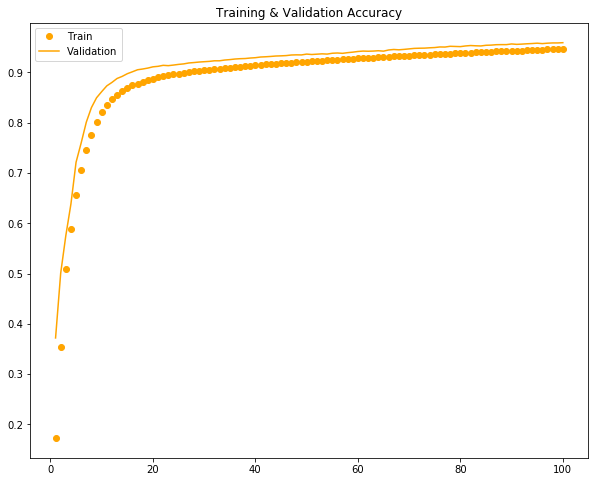

In [42]:
plotAccuracy(history_intermediate, color='orange')

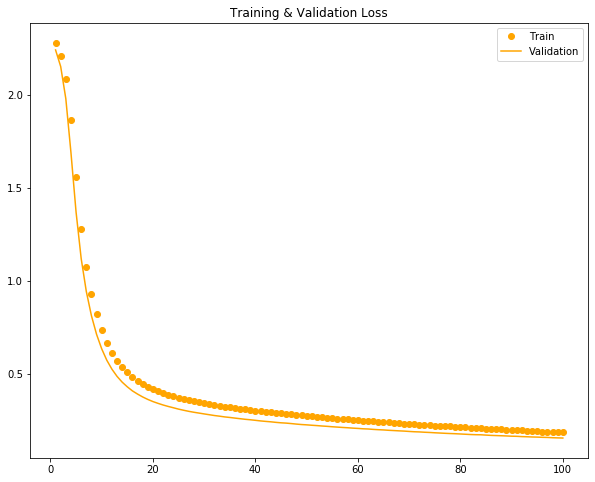

In [41]:
plotLoss(history_intermediate, color='orange')

# Deep Network
* Rough Heuristic
    * 2-4 Hidden layers to start
    * Reduce layers -> How does validation error respond?
        * Reducer Error = Good, fewer layers trains faster
        * Increases Error = Reverse, you need the capacity
    * Increase layers --> What happens to validation error?
        * Reduces Error -> Try another layer
        * Increases Error = Reverse, you're likely moving into overfitting regime
* What does more layers say about your problem?
    * More abstract ground truth
    * You expect there are higher level representations in your problem
    * For example - shapes (edges -> corners -> composites)

In [25]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784, )))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                650       
Total params: 63,370
Trainable params: 63,370
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
history_deep = model.fit(X_train, y_train, validation_split=0.1, epochs=epochs, batch_size=batch_size)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 1s 23us/step - loss: 2.3078 - acc: 0.1116 - val_loss: 2.3026 - val_acc: 0.1050
Epoch 2/100
54000/54000 [==============================] - 1s 19us/step - loss: 2.3015 - acc: 0.1127 - val_loss: 2.3017 - val_acc: 0.1050
Epoch 3/100
54000/54000 [==============================] - 1s 19us/step - loss: 2.3012 - acc: 0.1121 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 4/100
54000/54000 [==============================] - 1s 18us/step - loss: 2.3011 - acc: 0.1128 - val_loss: 2.3009 - val_acc: 0.1045
Epoch 5/100
54000/54000 [==============================] - 1s 19us/step - loss: 2.3008 - acc: 0.1124 - val_loss: 2.3012 - val_acc: 0.1050
Epoch 6/100
54000/54000 [==============================] - 1s 18us/step - loss: 2.3006 - acc: 0.1136 - val_loss: 2.3009 - val_acc: 0.1050
Epoch 7/100
54000/54000 [==============================] - 1s 18us/step - loss: 2.3004 - acc: 0.1122 - val_loss: 2.3005 - v

54000/54000 [==============================] - 1s 18us/step - loss: 0.6333 - acc: 0.8314 - val_loss: 0.5617 - val_acc: 0.8610
Epoch 60/100
54000/54000 [==============================] - 1s 18us/step - loss: 0.6094 - acc: 0.8381 - val_loss: 0.5376 - val_acc: 0.8675
Epoch 61/100
54000/54000 [==============================] - 1s 18us/step - loss: 0.5875 - acc: 0.8437 - val_loss: 0.5169 - val_acc: 0.8735
Epoch 62/100
54000/54000 [==============================] - 1s 19us/step - loss: 0.5679 - acc: 0.8496 - val_loss: 0.4993 - val_acc: 0.8732
Epoch 63/100
54000/54000 [==============================] - 1s 18us/step - loss: 0.5502 - acc: 0.8540 - val_loss: 0.4827 - val_acc: 0.8783
Epoch 64/100
54000/54000 [==============================] - 1s 18us/step - loss: 0.5345 - acc: 0.8586 - val_loss: 0.4688 - val_acc: 0.8818
Epoch 65/100
54000/54000 [==============================] - 1s 18us/step - loss: 0.5203 - acc: 0.8621 - val_loss: 0.4558 - val_acc: 0.8860
Epoch 66/100
54000/54000 [==============

In [29]:
loss_deep, accuracy_deep = model.evaluate(X_test, y_test)
resultsDF.loc['Deep']= [loss_deep, accuracy_deep]
print(f'Test Loss {loss_deep}, Accuracy {accuracy_deep}')

10000/10000 [==============================] - 0s 15us/step
Test Loss 0.3059245915055275, Accuracy 0.925


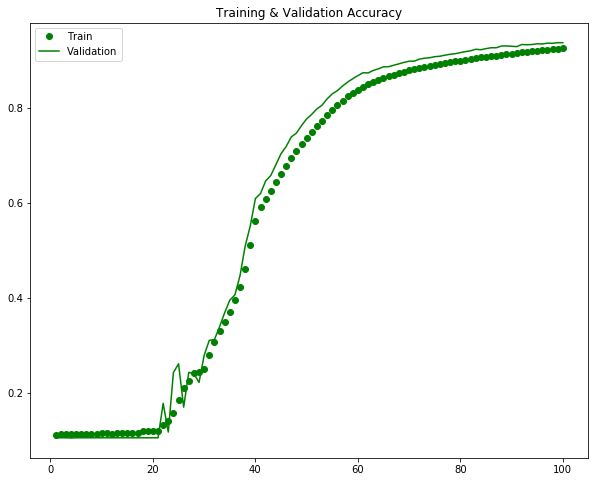

In [43]:
plotAccuracy(history_deep, color='green')

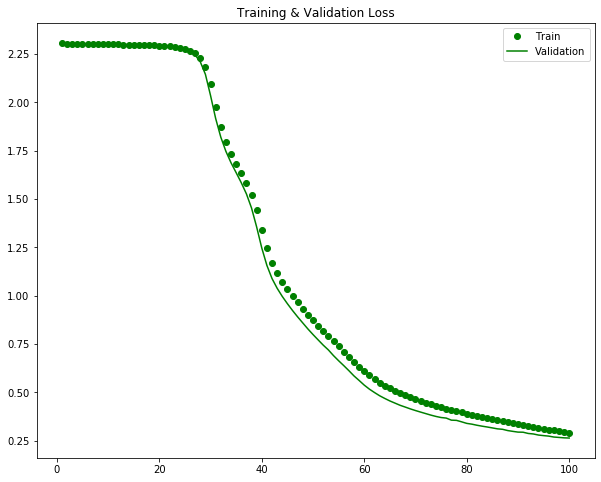

In [44]:
plotLoss(history_deep, color='green')

In [ ]:
## Training Larger Nets
## Effectiveness of Gradient Descent

# Comparison

In [30]:
resultsDF

,Loss,Accuracy
Shallow,0.193300,0.9436
Intermediate,0.182300,0.9452
Deep,0.305925,0.9250


## Loss
* It took a number of epochs for our deep network to make progress

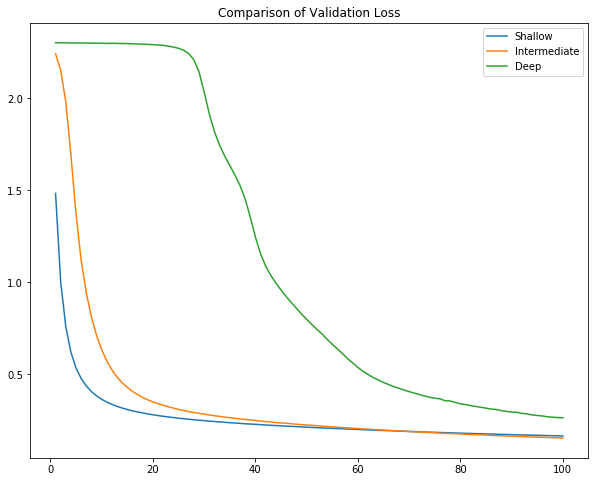

In [33]:
shallow_loss      = history_shallow.history['val_loss']
intermediate_loss = history_intermediate.history['val_loss']
deep_loss         = history_deep.history['val_loss']
ranged            = range(1, epochs + 1)

plt.figure(figsize=(10,8))
plt.plot(ranged, shallow_loss, label='Shallow')
plt.plot(ranged, intermediate_loss, label='Intermediate')
plt.plot(ranged, deep_loss, label='Deep')
plt.title('Comparison of Validation Loss')
plt.legend()
plt.show()

## Accuracy

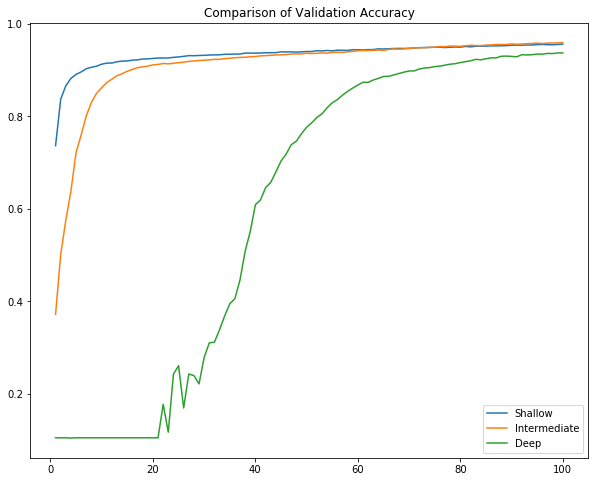

In [37]:
shallow_acc      = history_shallow.history['val_acc']
intermediate_acc = history_intermediate.history['val_acc']
deep_acc         = history_deep.history['val_acc']
ranged           = range(1, epochs + 1)

plt.figure(figsize=(10,8))
plt.plot(ranged, shallow_acc, label='Shallow')
plt.plot(ranged, intermediate_acc, label='Intermediate')
plt.plot(ranged, deep_acc, label='Deep')
plt.title('Comparison of Validation Accuracy')
plt.legend()
plt.show()

# Activations
* In the previous example we used a sigmoid.
* Sigmoids can saturate when their values are close to 0 and 1 making learning slow
* Retrain the deep network with a reLu

In [46]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784, )))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [47]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                650       
Total params: 63,370
Trainable params: 63,370
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
history_deep_relu = model.fit(X_train, y_train, validation_split=0.1, epochs=epochs, batch_size=batch_size)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 2s 31us/step - loss: 1.2661 - acc: 0.6295 - val_loss: 0.4109 - val_acc: 0.8873
Epoch 2/100
54000/54000 [==============================] - 1s 19us/step - loss: 0.4073 - acc: 0.8815 - val_loss: 0.2793 - val_acc: 0.9212
Epoch 3/100
54000/54000 [==============================] - 1s 19us/step - loss: 0.3192 - acc: 0.9067 - val_loss: 0.2525 - val_acc: 0.9270
Epoch 4/100
54000/54000 [==============================] - 1s 19us/step - loss: 0.2722 - acc: 0.9196 - val_loss: 0.2135 - val_acc: 0.9413
Epoch 5/100
54000/54000 [==============================] - 1s 23us/step - loss: 0.2384 - acc: 0.9298 - val_loss: 0.1827 - val_acc: 0.9497
Epoch 6/100
54000/54000 [==============================] - 1s 20us/step - loss: 0.2141 - acc: 0.9368 - val_loss: 0.1646 - val_acc: 0.9548
Epoch 7/100
54000/54000 [==============================] - 1s 21us/step - loss: 0.1931 - acc: 0.9427 - val_loss: 0.1571 - v

54000/54000 [==============================] - 1s 19us/step - loss: 0.0152 - acc: 0.9967 - val_loss: 0.1014 - val_acc: 0.9748
Epoch 60/100
54000/54000 [==============================] - 1s 19us/step - loss: 0.0145 - acc: 0.9969 - val_loss: 0.1061 - val_acc: 0.9740
Epoch 61/100
54000/54000 [==============================] - 1s 22us/step - loss: 0.0139 - acc: 0.9971 - val_loss: 0.1154 - val_acc: 0.9722
Epoch 62/100
54000/54000 [==============================] - 1s 20us/step - loss: 0.0133 - acc: 0.9973 - val_loss: 0.1052 - val_acc: 0.9753
Epoch 63/100
54000/54000 [==============================] - 1s 20us/step - loss: 0.0127 - acc: 0.9975 - val_loss: 0.1030 - val_acc: 0.9737
Epoch 64/100
54000/54000 [==============================] - 1s 18us/step - loss: 0.0122 - acc: 0.9976 - val_loss: 0.1065 - val_acc: 0.9747
Epoch 65/100
54000/54000 [==============================] - 1s 18us/step - loss: 0.0113 - acc: 0.9978 - val_loss: 0.1062 - val_acc: 0.9743
Epoch 66/100
54000/54000 [==============

In [52]:
loss_deep_relu, accuracy_deep_relu = model.evaluate(X_test, y_test)
resultsDF.loc['Deep - Relu']= [loss_deep_relu, accuracy_deep_relu]
print(f'Test Loss {loss_deep_relu}, Accuracy {accuracy_deep_relu}')

10000/10000 [==============================] - 0s 18us/step
Test Loss 0.13211337611292714, Accuracy 0.972


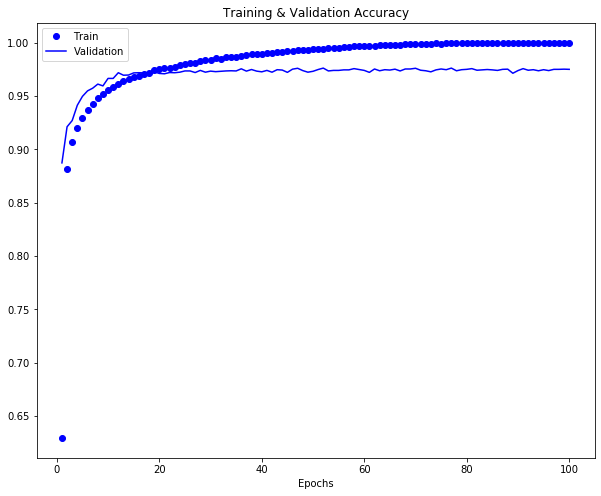

In [60]:
plotAccuracy(history_deep_relu)

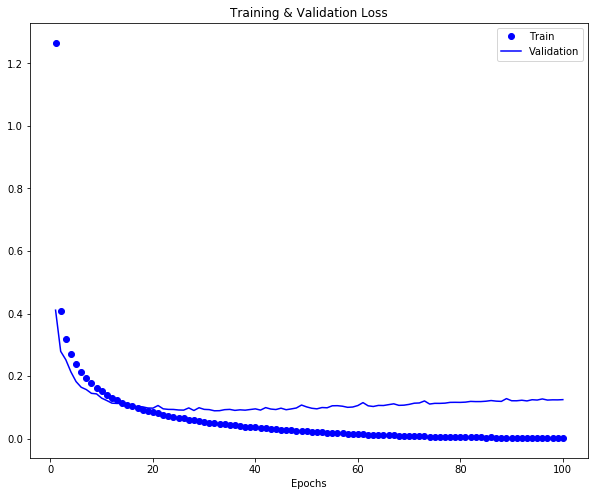

In [61]:
plotLoss(history_deep_relu)

## Comparison
* Accuracy was best with Relu in the deep model
* Improved accuracy by 5% over deep model 
* Relu reduced error over the Intermediate Model by over 40%

In [63]:
resultsDF.sort_values('Accuracy', ascending=False)

,Loss,Accuracy
Deep - Relu,0.132113,0.9720
Intermediate,0.182300,0.9452
Shallow,0.193300,0.9436
Deep,0.305925,0.9250


## Accuracy
* Relu was able to back propagate errors much more efficiently compared
* We reached optimum in under 15 epochs with Relu Activation

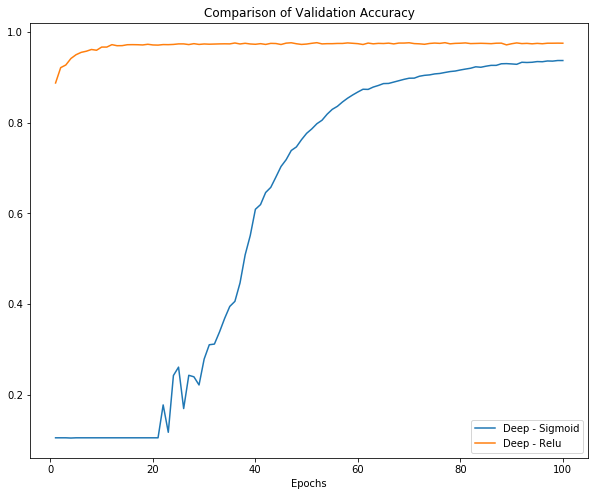

In [64]:
deep_acc_relu    = history_deep_relu.history['val_acc']
deep_acc         = history_deep.history['val_acc']
ranged           = range(1, epochs + 1)

plt.figure(figsize=(10,8))
plt.plot(ranged, deep_acc, label='Deep - Sigmoid')
plt.plot(ranged, deep_acc_relu, label='Deep - Relu')
plt.title('Comparison of Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.show()

# Closing
* We built models on the MNIST dataset
* We used Dense connections and varied the depth of the layers
* We showed the impact of activation function 
    * Sigmoid is inefficient due to neuron saturation
    * reLu was dramatically more effective on the deep layer model
* There are other improvements to explore
    * Weight Initialization
    * Optimizer (Momentum, AdaGrad, RMSProp, Adam)
    * Learning Rates (Schedule, Adaptive, One Cycle) 
    * Batch Normalization
    * Regularization
* There are other models superior to Densely connected layers for computer vision
    * Convolutional layers
    * Pretrained layers with Fine Tuning